In [ ]:
### prepare NBA players list and label
### scrape NBA players' college data from basketball reference

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

### Extract NBA player's list and VORP data

In [3]:
player_info = defaultdict(list)
#VORP = np.array([])
tables = []
for i in range(28):
    year = str(2017 - i)
    file = 'Dataset/NBA/' + year + '.csv'
    df = pd.read_csv(file)
    tables.append(df)
    for idx in range(len(df['Player'].values)):
        player_info[df['Player'].values[idx]].append((int(year), float(df.iloc[idx, -1])))
    #VORP = np.append(VORP, df['VORP▼'].values)

In [4]:
player_VORP = defaultdict(float)
for player in player_info:
    info = player_info[player]
    s, count = 0.0, 0.0
    for t in info:
        s += t[1]
        count += 1
    player_VORP[player] = float(s / count)

In [5]:
label = sorted(player_VORP.items(), key=lambda x: x[1], reverse=True)

In [6]:
df = pd.read_csv('Dataset/NBA/2017.csv')

In [7]:
player_info

defaultdict(list,
            {'Zaza Pachulia\\pachuza01': [(2017, 1.2),
              (2016, 1.7),
              (2015, 1.5),
              (2014, 0.4),
              (2013, 0.6),
              (2012, 1.4),
              (2011, 0.2),
              (2010, 0.2),
              (2009, 0.3),
              (2008, 0.2),
              (2007, -0.7),
              (2006, 1.0),
              (2005, 0.7),
              (2004, 0.5)],
             'Maurice Taylor\\tayloma01': [(2006, -0.1),
              (2005, -1.0),
              (2004, -0.8),
              (2003, -1.0),
              (2001, -0.1),
              (2000, -1.4),
              (1999, -0.6),
              (1998, -1.0)],
             'Eric Riley\\rileyer01': [(1999, 0.1),
              (1998, -0.2),
              (1996, -0.1),
              (1995, -0.1),
              (1994, -0.1)],
             'Robbie Hummel\\hummero01': [(2015, -0.3), (2014, 0.0)],
             'James Robinson\\robinja02': [(2001, -0.1),
              (1999, -0.1),


In [8]:
player_list = list(player_info.keys())
player_list

['Zaza Pachulia\\pachuza01',
 'Avery Bradley\\bradlav01',
 'Eric Riley\\rileyer01',
 'Reggie Lewis\\lewisre01',
 'Lucious Harris\\harrilu01',
 'Jerome Jordan\\jordaje01',
 'John Thomas\\thomajo02',
 'James Robinson\\robinja02',
 'John Morton\\mortojo01',
 'Danilo Gallinari\\gallida01',
 'Jabari Smith\\smithja01',
 'Charles Claxton\\claxtch01',
 'Jordan Hamilton\\hamiljo02',
 'Nate Robinson\\robinna01',
 'Cliff Levingston\\levincl01',
 'Kyle Wiltjer\\wiltjky01',
 'Ricky Davis\\davisri01',
 'Jabari Parker\\parkeja01',
 'Kyrie Irving\\irvinky01',
 'Darryl Watkins\\watkida01',
 'Erik Murphy\\murpher01',
 'Malik Rose\\rosema01',
 'T.J. McConnell\\mccontj01',
 'Craig Smith\\smithcr01',
 'Alton Lister\\listeal01',
 'DeMarcus Nelson\\nelsode01',
 'Pat Connaughton\\connapa01',
 'Andrea Bargnani\\bargnan01',
 'Giannis Antetokounmpo\\antetgi01',
 'Tom Copa\\copato01',
 'Lionel Chalmers\\chalmli01',
 'Luis Montero\\montelu01',
 'Michael Smith\\smithmi02',
 'Garrett Temple\\templga01',
 'Detlef Sch

In [8]:
plt.hist(VORP, np.linspace(-2, 10, 30))
plt.xlabel('Value over Replacement Player')
plt.ylabel('Number of Samples')

NameError: name 'VORP' is not defined

### Scrape the college statistics of all NBA players

In [11]:
player_id_list=[]
for i in player_list:
    name = i.split('\\')[1]
    init = name[0]
    ID = init + "/" + name 
    player_id_list.append(ID)

In [12]:
player_id_list

['p/pachuza01',
 'b/bradlav01',
 'r/rileyer01',
 'l/lewisre01',
 'h/harrilu01',
 'j/jordaje01',
 't/thomajo02',
 'r/robinja02',
 'm/mortojo01',
 'g/gallida01',
 's/smithja01',
 'c/claxtch01',
 'h/hamiljo02',
 'r/robinna01',
 'l/levincl01',
 'w/wiltjky01',
 'd/davisri01',
 'p/parkeja01',
 'i/irvinky01',
 'w/watkida01',
 'm/murpher01',
 'r/rosema01',
 'm/mccontj01',
 's/smithcr01',
 'l/listeal01',
 'n/nelsode01',
 'c/connapa01',
 'b/bargnan01',
 'a/antetgi01',
 'c/copato01',
 'c/chalmli01',
 'm/montelu01',
 's/smithmi02',
 't/templga01',
 's/schrede01',
 'd/dareyi01',
 'o/oquinky01',
 'h/hardati02',
 't/thompmy01',
 'b/boguemu01',
 'k/krstine01',
 's/stackje01',
 'o/outlatr01',
 'b/bennema01',
 'b/bucknst01',
 'w/wagnemi01',
 'b/bayleje01',
 'h/hansbbe01',
 's/shawca01',
 'm/milescj01',
 'e/ennisja01',
 'f/fundela01',
 'm/minorgr01',
 'k/korveky01',
 'd/dunntr01',
 'p/poweljo01',
 'r/radulmi01',
 'g/georgta01',
 'h/hensost01',
 'f/fordtj01',
 'd/durhapa01',
 'w/wallabe01',
 'm/madkige01'

In [13]:
def college_data_scraper(url, name):
    ## scrape the college table
    req = requests.get(url)
    index = req.text.find('div_all_college_stats')
    text = req.text[index:]
    soup = BeautifulSoup(text, "html.parser")
    table = soup.find('table', id = 'all_college_stats')
    
    ## extract column headers
    column_headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
    
    ## extract contents from the table
    data_rows = soup.findAll('tr')[2:]  # skip the first two columns
    player_data = [[td.getText() for td in data_rows[i].findAll('td')] 
               for i in range(len(data_rows))]
    
    ## extract the first column (season)
    season_data = [[th.getText() for th in data_rows[i].findAll('th')] 
               for i in range(len(data_rows))]
    season_data = np.reshape(season_data, -1)
    
    ## combine the columns and data as a data frame
    df = pd.DataFrame(player_data, columns=column_headers[1:])
    df["Season"] = season_data
    df["Name"] = name
    return(df)

In [14]:
base = 'http://www.basketball-reference.com/players/'
ext = '.html'
#player_list = ["b/bennean01","a/anderal01"]
college_df = pd.DataFrame()
for i in player_id_list:
    url = base + i + ext
    try:
        tmp = college_data_scraper(url, i)
        college_df = pd.concat([college_df, tmp])
        print(i)
    except:
        continue

In [23]:
college_df.shape

(8636, 27)

In [19]:
all_name =college_df.Name
len(all_name.unique())

2001

In [25]:
## write the table to csv
college_df.to_csv("college_raw_data.csv",index=False)

### Clean college raw data

##### Predictors
1. Delete row if column "G" < threshold (threshold = the max value of that person * 1/4)
2. Calculate FTA, FGA, 3PA, STL, BLK, TOV per game
3. Calcuate number of actual years played by length
4. Calculate DRB% = (lg_TRB - lg_ORB) / lg_TRB
5. Remove career rows

http://www.basketball-reference.com/about/per.html

In [30]:
college_raw = pd.read_csv("college_raw_data.csv")

In [31]:
college_raw.head(3)

,Age,College,G,MP,FG,FGA,3P,3PA,FT,FTA,...,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season,Name
0,19.0,TEXAS,34,1003.0,159.0,368.0,42.0,112.0,36.0,66.0,...,396,0.432,0.375,0.545,29.5,11.6,2.9,2.1,2009-10,b/bradlav01
1,NaN,NaN,34,1003.0,159.0,368.0,42.0,112.0,36.0,66.0,...,396,0.432,0.375,0.545,29.5,11.6,2.9,2.1,Career,b/bradlav01
2,19.0,MICHIGAN,31,403.0,34.0,56.0,0.0,1.0,16.0,35.0,...,84,0.607,0.000,0.457,13.0,2.7,3.3,0.5,1989-90,r/rileyer01


In [32]:
college_raw.columns

Index(['Age', 'College', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%',
       'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'Season', 'Name'],
      dtype='object')

#### Remove career rows

In [33]:
college_clean = college_raw[college_raw.Season != "Career"]

In [34]:
college_clean.shape

(6634, 27)

In [42]:
len(college_clean.Name.unique())

2001

#### Delete row if column "G" < threshold

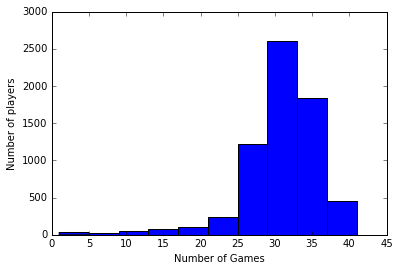

In [50]:
plt.hist(college_clean.G)
plt.xlabel('Number of Games')
plt.ylabel('Number of players')

In [51]:
college_clean.G.max()

41

In [52]:
college_clean.G.min()

1

In [ ]:
threshold = 10
college_clean = college_clean[college_clean.G > threshold]